<a href="https://colab.research.google.com/github/jayabban/Data-Science/blob/main/Fs%2BNor_Data_Minning_ANN_Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading the Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle Dataset/diabetes.csv')

Data Exploration

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in our dataset

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.duplicated().sum()

0

There are no duplicates in our data set

Visualization

In [11]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Map'}>

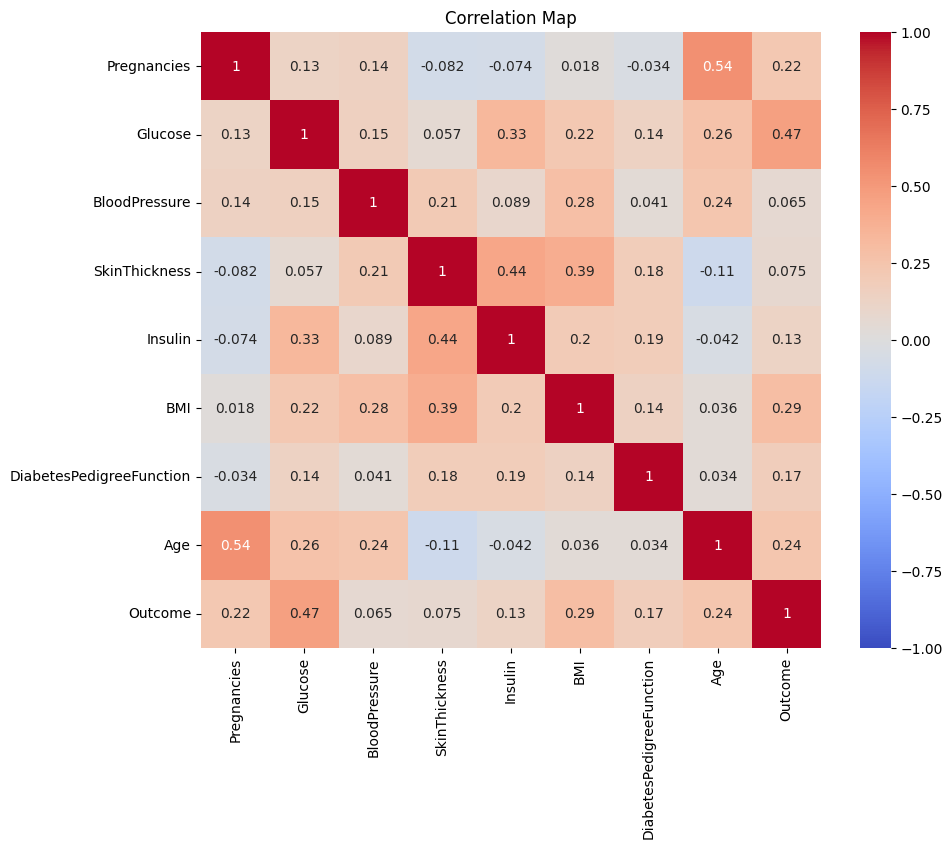

In [12]:
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [13]:
out = df.Outcome.value_counts()
out

0    500
1    268
Name: Outcome, dtype: int64

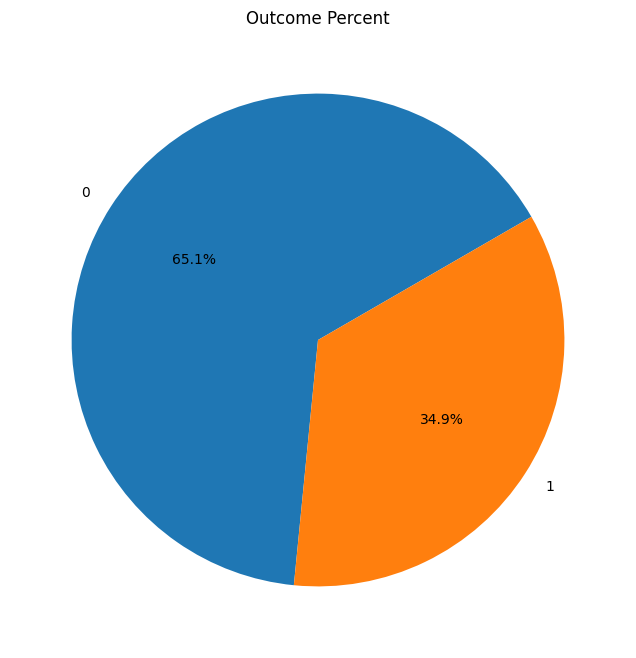

In [14]:
plt.figure(figsize=(10,8))
plt.pie(out, labels= out.index, autopct='%1.1f%%', startangle=30)
plt.title("Outcome Percent")
plt.show()

# Trainning the model

## Feature Selection

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values



In [17]:
col_norm = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

In [18]:
df1_norm = df[col_norm].apply(lambda x: ( (x - x.min()) / (x.max()- x.min())))

In [19]:
X = df1_norm
y = df['Outcome']

In [20]:
feat_Preg = tf.feature_column.numeric_column('Pregnancies')
feat_Glu = tf.feature_column.numeric_column('Glucose')
feat_Blood = tf.feature_column.numeric_column('BloodPressure')
feat_Skin = tf.feature_column.numeric_column('SkinThickness')
feat_Insu = tf.feature_column.numeric_column('Insulin')
feat_BMI = tf.feature_column.numeric_column('BMI')
feat_Ped = tf.feature_column.numeric_column('DiabetesPedigreeFunction')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [21]:
feat_cols = [feat_Preg,feat_Glu,feat_Blood,feat_Skin,
             feat_Insu,feat_BMI,feat_Ped]

In [22]:
# print(X)

# Splitting Data into trainning and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


## Feature scaling

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc =StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [25]:
# print(X_test)

In [26]:
from tensorflow import keras
import tensorflow as tf

In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)

## Building the model using ANN

In [28]:
ann = keras.models.Sequential()

Adding the layers

In [29]:
ann.add(tf.keras.layers.Dense(units=10, activation = 'relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=10, activation = 'relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=2, activation = 'sigmoid'))

## Trainning the data

### Compile

In [32]:
ann.compile(optimizer='adam', loss="binary_crossentropy", metrics=['Accuracy'])

Fitting the dataset

In [33]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 2s 5ms/step - loss: 0.6762 - Accuracy: 0.6401
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6694 - Accuracy: 0.6401
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6657 - Accuracy: 0.6401
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6628 - Accuracy: 0.6401
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6613 - Accuracy: 0.6401
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6596 - Accuracy: 0.6401
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6589 - Accuracy: 0.6401
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6571 - Accuracy: 0.6401
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6557 - Accuracy: 0.6401
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6546 - Accuracy: 0.6401
Epoch 11/

In [34]:
y_pred = ann.predict(X_test)
print(y_pred)

5/5 [==============================] - 0s 4ms/step
[[0.08742089 0.95232415]
 [0.82964647 0.16664752]
 [0.88296986 0.11453676]
 [0.3662325  0.60841894]
 [0.8341404  0.15601765]
 [0.9525105  0.04888786]
 [0.16332547 0.8370776 ]
 [0.1652614  0.83415866]
 [0.48057956 0.48017505]
 [0.76901674 0.22547433]
 [0.3557707  0.6256188 ]
 [0.09413719 0.9309851 ]
 [0.7582     0.22683483]
 [0.7433258  0.23387326]
 [0.85233295 0.14133409]
 [0.8149086  0.17886545]
 [0.10835018 0.89933014]
 [0.95130795 0.05236727]
 [0.69595665 0.29054657]
 [0.71556664 0.2800545 ]
 [0.3689377  0.6443862 ]
 [0.55353844 0.48288605]
 [0.67456454 0.31364822]
 [0.9601507  0.04069835]
 [0.9311015  0.06041409]
 [0.5691157  0.44596303]
 [0.9188374  0.07028048]
 [0.08461827 0.93029773]
 [0.8572925  0.13300398]
 [0.830944   0.16049889]
 [0.5168175  0.45900217]
 [0.7559368  0.25673917]
 [0.8867363  0.1107489 ]
 [0.51515037 0.47530648]
 [0.8610576  0.12754531]
 [0.3088327  0.69739836]
 [0.47000363 0.51656723]
 [0.88535964 0.10752154]

In [35]:
y_pred =np.argmax(y_pred, axis =-1)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [36]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[99  8]
 [18 29]]


In [38]:
ann_acc= (accuracy_score(y_test, y_pred)*100)

In [39]:
ann_acc

83.11688311688312

Text(50.722222222222214, 0.5, 'Actual')

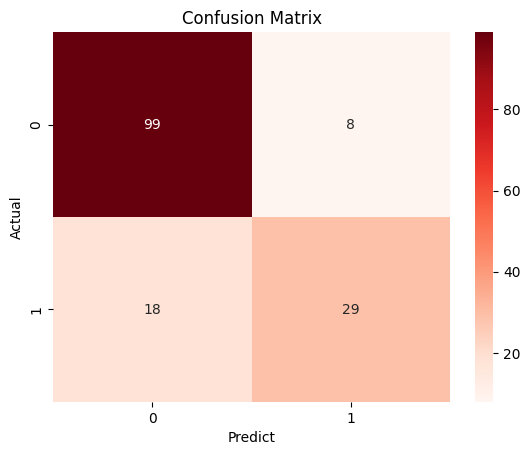

In [40]:
ax = sns.heatmap(cm, annot=True, cmap='Reds')
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predict')
ax.set_ylabel('Actual')

In [41]:
18 + 11

29

**Conclusion**

So out of the 154 X_test Dataset, 125 were predicted correctly while 29 were redicted not correctly. 96 were predicted not having diabeties while 11 was mispredicted to have. 29 were predicted to have diabeties while 18 was mispredicted not to have diabeties. The ANN reduced our performance by  0.1%.

Observation : Applying Normalization to my feature didnt improve my performance of my model rather reduced it by 1%, on the other hand applying Standardization increased the performance to 82%.

Conclusion : To be able to improve the performance of the model, its adviceable to use appropriate feature scaling techniques based on the kind of data set you working on and also the algorithm being used.

FS+Nor = Logistic Regression (83%) |
KNClassifier = (80%) |
FS+Nor = ANN (81%) |
FS+Stand = ANN(82%)

In all we had an accuracy of (81%).

